In [1]:
# Import required libraries and classes
import pandas as pd
import numpy as np
import os

# Change to project root directory
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(f"Changed working directory to: {os.getcwd()}")

# Import custom modules
from utils.model.model_manager import ModelManager

# Get absolute paths
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, 'data', 'BTCUSDT_1m_1h-pump05_170715_250228.csv')

# Load historical data
df = pd.read_csv(data_path, parse_dates=['timestamp'])

# Display the first few rows
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,3.0,0.075183,320.390851,0,...,NaN,4.422529e-02,0.0,0.042352,NaN,NaN,NaN,-0.915295,NaN,0.586207
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.000000,0.000000,0,...,NaN,0.000000e+00,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.586207
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,2.0,0.261074,1117.542921,0,...,NaN,2.610740e+08,0.0,1.000000,NaN,NaN,NaN,1.000000,NaN,0.586207
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,3.0,0.012008,51.171852,0,...,NaN,1.200800e+07,0.0,1.000000,NaN,NaN,NaN,1.000000,NaN,0.586207
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1.0,0.140796,599.999338,0,...,NaN,1.407960e+08,0.0,1.000000,NaN,NaN,NaN,1.000000,NaN,0.586207


In [2]:
# Initialize our ModelManager with symbol and date range
symbol = "BTCUSDT"
start_date = "2017-07-15"
end_date = "2025-02-28"
manager = ModelManager(symbol, start_date, end_date)

# Load data into our ModelManager
manager.load_data(custom_path=data_path)

# Split and prepare data
test_window_days = 150
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(             open      high       low     close     volume  num_trades  \
 0         4261.48   4261.48   4261.48   4261.48   1.775183         3.0   
 1         4261.48   4261.48   4261.48   4261.48   0.000000         0.0   
 2         4280.56   4280.56   4280.56   4280.56   0.261074         2.0   
 3         4261.48   4261.48   4261.48   4261.48   0.012008         3.0   
 4         4261.48   4261.48   4261.48   4261.48   0.140796         1.0   
 ...           ...       ...       ...       ...        ...         ...   
 3738003  63288.20  63332.63  63288.19  63318.01  11.700120      2981.0   
 3738004  63318.01  63356.65  63310.00  63324.99   9.291100      2823.0   
 3738005  63324.99  63352.00  63324.99  63338.00   7.185170      1830.0   
 3738006  63337.99  63356.00  63337.99  63348.00   6.835060       827.0   
 3738007  63348.01  63359.05  63327.59  63327.59  10.824160      1331.0   
 
          taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0              0.0751

In [3]:
# Configure our model with default parameters
manager.configure_model()

# Train the model and evaluate on test set
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.2, min_precision=0.4)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.9795


np.float64(0.9795323916752479)

In [4]:
# Get and print model performance metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.9795
AUC-ROC Score: 0.9999

Overall Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

Class 0 Metrics:
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

Class 1 Metrics:
Precision: 1.0000
Recall:    0.2222
F1-Score:  0.3636

Using raw probabilities
Classification threshold: 0.9795
{'accuracy': 0.9999675927426261, 'precision': 0.9999675937928661, 'recall': 0.9999675927426261, 'f1': 0.999957281605117, 'auc_roc': np.float64(0.9999423846973756), 'optimal_threshold': np.float64(0.9795323916752479), 'precision_0': 0.9999675924425576, 'recall_0': 1.0, 'f1_0': 0.9999837959587121, 'precision_1': 1.0, 'recall_1': 0.2222222222222222, 'f1_1': 0.36363636363636365}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 2.12% of total SHAP value magnitude
Top 20 features explain 91.10% of total SHAP value magnitude
Ratio (Top/Bottom): 42.96x


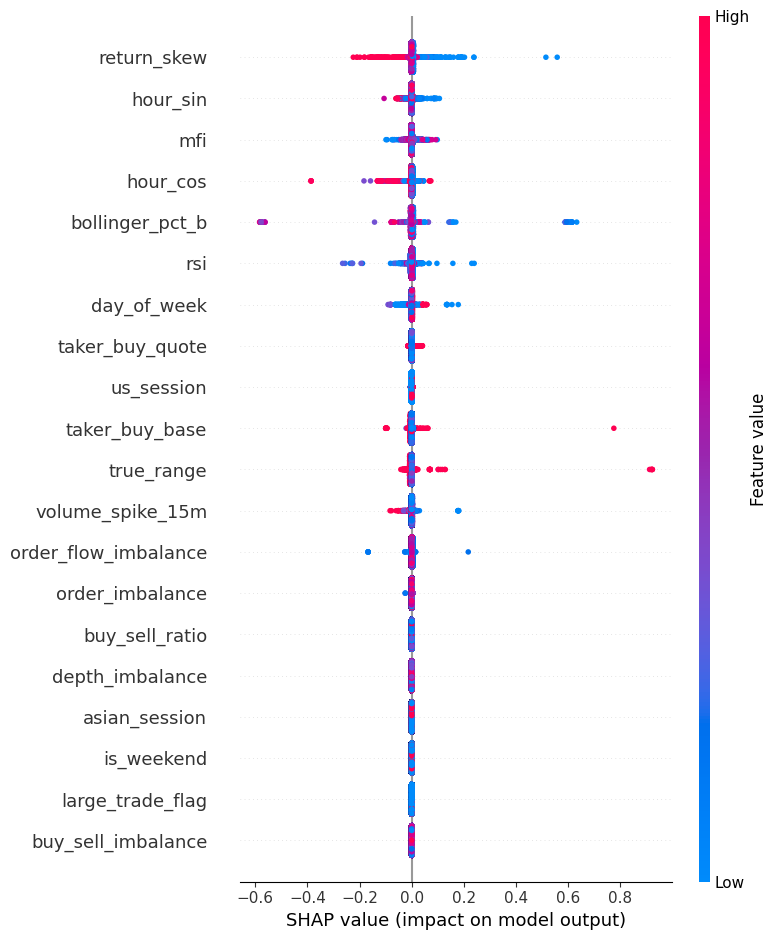

In [8]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 7.54% of total importance
Top 20 features explain 74.82% of total importance
Ratio (Top/Bottom): 9.92x


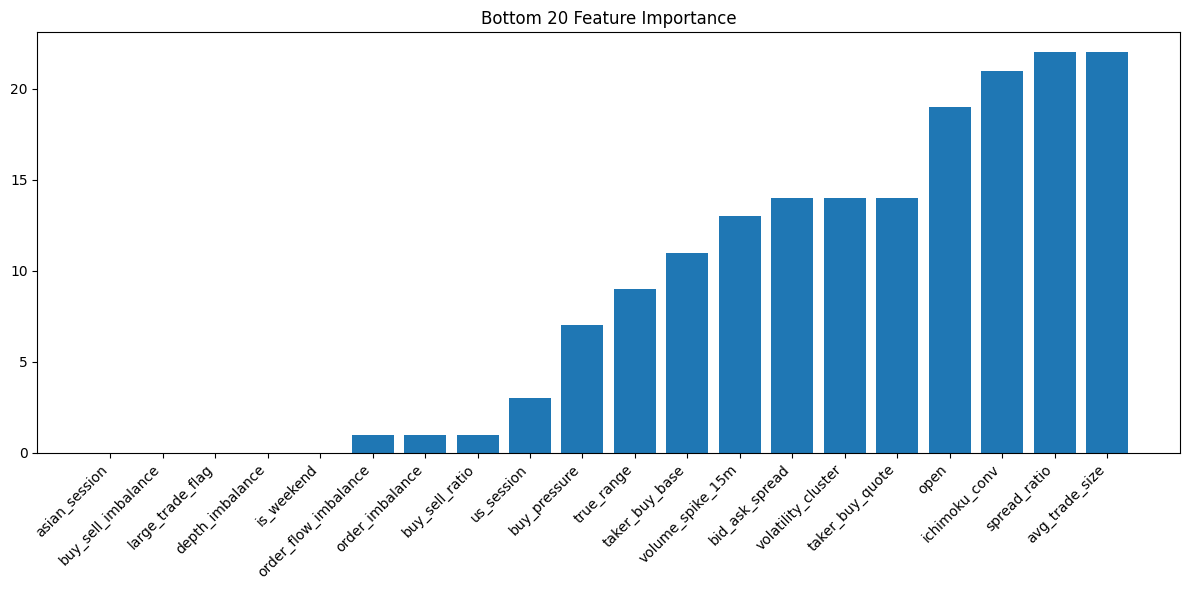

In [9]:
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store original params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    initial_train_ratio=0.3,
    step_ratio=0.07,
    threshold=manager.optimal_threshold
)

# Config new model for wf
manager.configure_walk_forward_model()

# Define fatures and labels
X = manager.df.drop(["label"], axis=1)
y = manager.df["label"]

# wf validation
predictions, true_labels, metrics_history = wf.validate(
    model=manager.model,
    X=X,
    y=y,
    timestamp_col="timestamp",
    print_results=True
)

In [ ]:
# Print validation results
wf.plot_metrics_over_time()

In [ ]:
# Initialize ExperimentTracker
from utils.model.experiment_tracker import ExperimentTracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf validation
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)